# About
Analysis of Daily Returns on Gold.

##### Datasource:
* Yahoo Finance: https://finance.yahoo.com/quote/GC%3DF/history

##### Context:
* For comparison with Bitcoin in Notebook 1 
* The data below shows that the historic volatility of gold is much less than that of bitcoin.

In [1]:
from datetime import datetime

from fattails.metrics import get_survival_probability
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import code from this repository
import sys; sys.path.insert(0, '../')  # Add root directory to path for imports

from utils.price import prices_to_returns

# Setup

### Load Data

In [3]:
# Load Raw Data
data_source = '../data/Gold_Yahoo_2000_2021.csv'

price_data = pd.read_csv(data_source)
price_data = price_data.set_index('Date')
price_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
...,...,...,...,...,...,...
2021-05-03,1788.500000,1793.000000,1788.500000,1791.400024,1791.400024,18.0
2021-05-04,1788.199951,1788.500000,1774.800049,1775.800049,1775.800049,182.0
2021-05-05,1781.500000,1784.099976,1779.199951,1784.099976,1784.099976,57.0


In [4]:
# Extract Closing Prices
closing_price_sr = price_data['Close'].rename('prices')
closing_price_sr.index = pd.to_datetime(closing_price_sr.index, format='%Y-%m-%d')

Calculate Returns:

In [5]:
gold_prices = closing_price_sr

# Calculate Returns
gold_returns = 100*prices_to_returns(gold_prices)  # Scale by 100 so 0.01 becomes 1% etc.

returns_df = gold_returns.to_frame()
returns_df

,prices
Date,
2000-08-31,1.606424
2000-09-01,-0.467118
2000-09-04,NaN
2000-09-05,NaN
2000-09-06,-0.580122
...,...
2021-05-03,1.363661
2021-05-04,-0.870826
2021-05-05,0.467391


### Missing Data Check

In [6]:
# Missing Data Count
gold_prices.isna().sum()

112

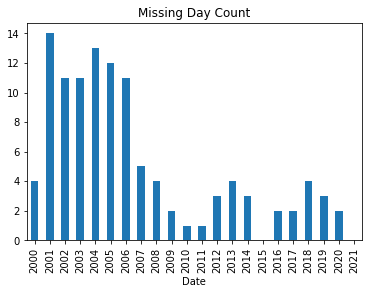

In [7]:
# NaN Count By Year
gold_prices.isna().groupby(gold_prices.index.year).sum().plot(title='Missing Day Count', kind='bar');

# Analyse

Summary statistics:

In [8]:
# Observed Range Summary
returns_df.agg(['max', 'mean', 'min']) \
          .astype(int)  # Remove decimals

,prices
max,9
mean,0
min,-9


# Plot the Prices

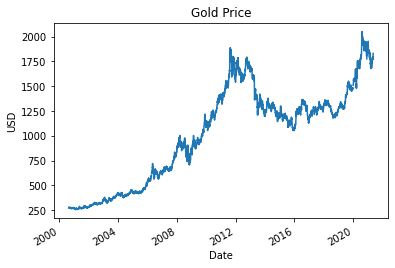

In [9]:
# Bitcoin Price History
gold_prices.plot(ylabel='USD', title='Gold Price');

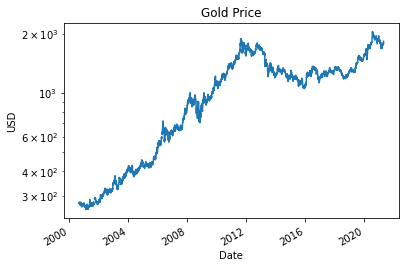

In [10]:
# Plot Log(Price) History
gold_prices.plot(ylabel='USD', title='Gold Price', logy=True);

### Plot the Returns

Plot daily returns:

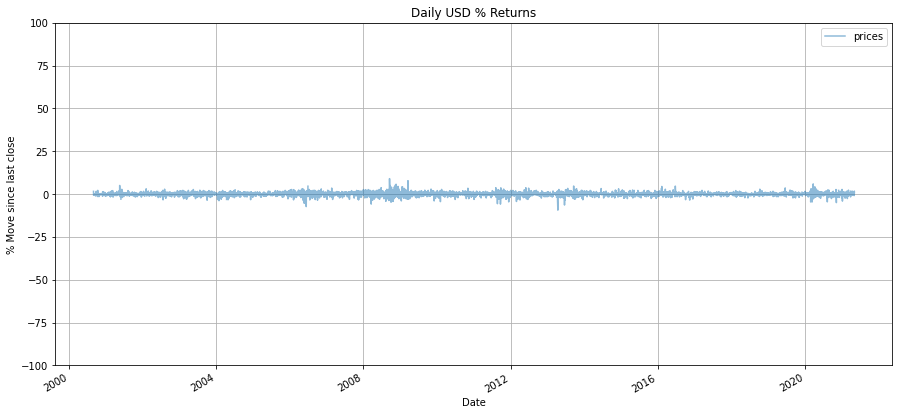

In [11]:
# Daily Returns
returns_df.plot(figsize=[15,7], alpha=0.5, grid=True, \
                ylim=[-100,100],  ylabel='% Move since last close', \
                title='Daily USD % Returns'); # ylabel requires pandas >=1.2.0

Zoom in on the y-axis:

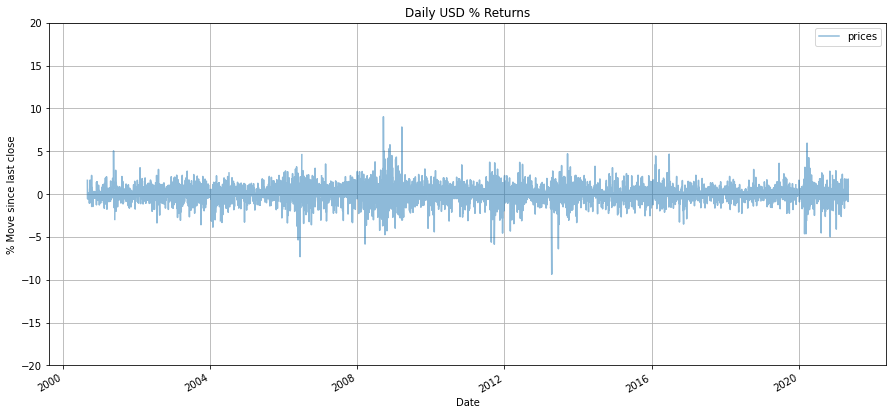

In [12]:
# Daily Returns
returns_df.plot(figsize=[15,7], alpha=0.5, grid=True, \
                ylim=[-20,20],  ylabel='% Move since last close', \
                title='Daily USD % Returns'); # ylabel requires pandas >=1.2.0

# Distribution
Historic distribution of the daily percentage returns.

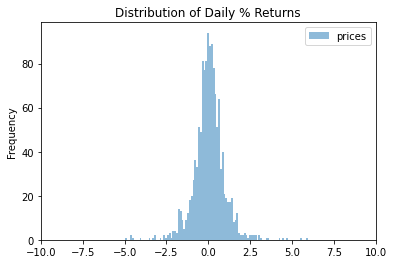

In [13]:
# Since 2016
start_year = 2016
returns_df.loc[returns_df.index>datetime(start_year,1,1)] \
          .plot(kind='hist', bins=100, alpha=0.5, \
                xlim=[-10, 10], \
                xlabel='Daily % Return', \
                title='Distribution of Daily % Returns');

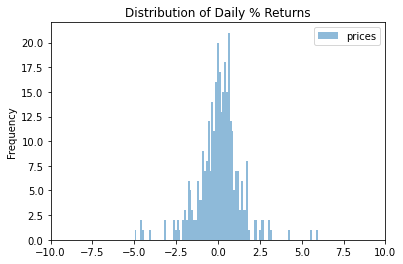

In [14]:
# Since 2020
start_year = 2020
returns_df.loc[returns_df.index>datetime(start_year,1,1)] \
          .plot(kind='hist', bins=100, alpha=0.5, \
                xlim=[-10, 10], \
                xlabel='Daily % Return', \
                title='Distribution of Daily % Returns');

### Deviations

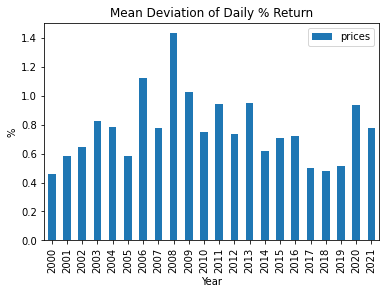

In [15]:
yearly_mean_deviation = returns_df.groupby(returns_df.index.year) \
                                  .mad()

yearly_mean_deviation.plot(kind='bar', title='Mean Deviation of Daily % Return', \
                           xlabel='Year', ylabel='%');

# Transaction Risk
Roughly trying to answer: _what's the risk of holding Gold for one day_

In [16]:
# Helper Function
def get_survival_df(value_sr):
    """Dataframe with values and their survival probability.
    
    Ordered from high survival probability.
    """
    survival_prob = get_survival_probability(value_sr)

    survival_df = pd.concat([value_sr, survival_prob], axis=1)
    survival_df.sort_values(by='survival_probability', ascending=False, inplace=True)

    return survival_df
    

Exceedance Probability
* For each level of % return, show the historic probability of something wider happening.

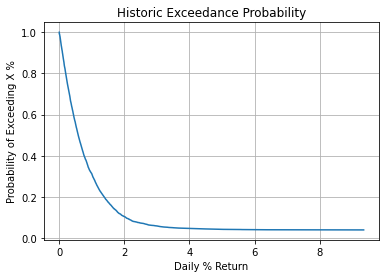

In [17]:
# Survival Probability
survival_df = get_survival_df(returns_df.prices.abs())
survival_df.plot('prices', 'survival_probability', grid=True, legend=None, \
                 xlabel='Daily % Return', ylabel='Probability of Exceeding X %', 
                 title='Historic Exceedance Probability');